# Data Wrangling: We Rate Dog

## Table of Contents
Step 0:Introduction

Step 1: Gathering data

Step 2: Assessing data

Step 3: Cleaning data

Step 4: Storing data

Step 5: Analyzing, and visualizing data

Step 6: Reporting

your data wrangling efforts
your data analyses and visualizations

## Step 0:Introduction
What Questions Are We Trying To Answer?
Q1. What Correlations can we find in the data that make a good doggo?
Q2. Which are the more popular; doggos, puppers, fullfers or poppos?
Q3. Which are the more popular doggo breeds and why is it Spaniels?

## Step 1 - Gathering data

In [84]:
import pandas as pd
import numpy as np
import requests
import json
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from IPython.display import display, Image
import urllib.request
import PIL.Image
from io import BytesIO
from PIL import Image

The first step of the wrangling process is to obtain data. For this project, we will work with different sources:

The WeRateDogs Twitter archive: a file in hand with data about each tweet by WeRateDogs (in csv format), provided by Udacity

The tweet image predictions: A file downloaded programatically, with breed predictions for each dog

Additional data from the Twitter API: additional data about each tweet (retweets and fav's), retrieved from Twitter's API

In [2]:
#load twitter-archive-enhanced.csv into twitter_archive_df
df_tarchive = pd.read_csv('twitter-archive-enhanced.csv')
df_tarchive.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [3]:
df_tarchive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [4]:
# Programatically request the .tsv file and load it into a separate dataframe.
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with  open('image-predictions.tsv', mode='wb') as file:
    file.write(response.content) 
df_image_predict = pd.read_csv('image-predictions.tsv', sep='\t')
df_image_predict.head(10)

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
5  666050758794694657  https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg   
6  666051853826850816  https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
7  666055525042405380  https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg   
8  666057090499244032  https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
9  666058600524156928  https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   
5        1    Bernese_mountain_dog  0.651137    True    English_springer   
6        1              box_turtle  0.933012   False          mud_turtle   
7        1                    chow  0.692517    True     Tibetan_mastiff   
8        1           shopping_cart  0.962465   False     shopping_basket   
9        1        miniature_poodle  0.201493    True            komondor   

    p2_conf  p2_dog                           p3   p3_conf  p3_dog  
0  0.156665    True            Shetland_sheepdog  0.061428    True  
1  0.074192    True          Rhodesian_ridgeback  0.072010    True  
2  0.138584    True                   bloodhound  0.116197    True  
3  0.360687    True           miniature_pinscher  0.222752    True  
4  0.243682    True                     Doberman  0.154629    True  
5  0.263788    True   Greater_Swiss_Mountain_dog  0.016199    True  
6  0.045885   False                     terrapin  0.017885   False  
7  0.058279    True                     fur_coat  0.054449   False  
8  0.014594   False             golden_retriever  0.007959    True  
9  0.192305    True  soft-coated_wheaten_terrier  0.082086    True

In [5]:
df_image_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


Retrieve additional data from Twitter APIs, for each of the tweets in twitter-archive-enhanced.csv
NB: I used the data provided by Udacity.

In [6]:
tweets_data = []
with open('tweet-json.txt', mode='r') as file:
    for line in file:
        data = json.loads(line)
        tweets_data.append(data)
        

In [7]:
tweets_data

[{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
  'id': 892420643555336193,
  'id_str': '892420643555336193',
  'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
  'truncated': False,
  'display_text_range': [0, 85],
  'entities': {'hashtags': [],
   'symbols': [],
   'user_mentions': [],
   'urls': [],
   'media': [{'id': 892420639486877696,
     'id_str': '892420639486877696',
     'indices': [86, 109],
     'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
     'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
     'url': 'https://t.co/MgUWQ76dJU',
     'display_url': 'pic.twitter.com/MgUWQ76dJU',
     'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
     'type': 'photo',
     'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'},
      'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
      'small': {'w': 540, 'h': 528, 'resize': 'fit'},

In [8]:
tdata2_df = pd.read_json('tweet-json.txt', lines=True)
tdata2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [9]:
df_tweets_data = pd.DataFrame(tweets_data, columns=["id",'retweet_count', 'favorite_count'])

In [10]:
df_tweets_data.head()

id  retweet_count  favorite_count
0  892420643555336193           8853           39467
1  892177421306343426           6514           33819
2  891815181378084864           4328           25461
3  891689557279858688           8964           42908
4  891327558926688256           9774           41048

In [11]:
df_tweets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


## Step 2: Assessing data

#### The goal of assessing the datasets is to check for two things:
> Quality issues: This is when Data has quality issues has problems with its contents: missing, corrupted, inacurate, duplicate or incorrect data.

> Tidiness Issues: This is when the data has specific structural issues. It is also called "dirty data","untidy" or "messy" data.

> Data Quality Issues can be assessed either visually and programatically.

In [12]:
#creating a copy for the datasets
df_tarchive_copy = df_tarchive.copy()
df_image_predict_copy = df_image_predict.copy()
df_tweets_data_copy = df_tweets_data.copy()

In [13]:
df_tarchive_copy.shape, df_image_predict_copy.shape, df_tweets_data.shape

((2356, 17), (2075, 12), (2354, 3))

In [14]:
df_tarchive_copy.sample(10)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
215   851224888060895234                    NaN                  NaN   
1073  739932936087216128                    NaN                  NaN   
2038  671550332464455680           6.715449e+17         4.196984e+09   
531   808106460588765185                    NaN                  NaN   
606   798340744599797760                    NaN                  NaN   
544   805932879469572096                    NaN                  NaN   
2270  667502640335572993                    NaN                  NaN   
2293  667152164079423490                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2282  667211855547486208                    NaN                  NaN   

                      timestamp  \
215   2017-04-10 00:06:42 +0000   
1073  2016-06-06 21:32:13 +0000   
2038  2015-12-01 04:44:10 +0000   
531   2016-12-12 00:29:28 +0000   
606   2016-11-15 01:44:00 +0000   
544   2016-12-06 00:32:26 +0000   
2270  2015-11-20 00:40:05 +0000   
2293  2015-11-19 01:27:25 +0000   
1     2017-08-01 00:17:27 +0000   
2282  2015-11-19 05:24:37 +0000   

                                                 source  \
215   <a href="http://twitter.com/download/iphone" r...   
1073  <a href="http://twitter.com/download/iphone" r...   
2038  <a href="http://twitter.com/download/iphone" r...   
531   <a href="http://twitter.com/download/iphone" r...   
606   <a href="http://twitter.com/download/iphone" r...   
544   <a href="http://twitter.com/download/iphone" r...   
2270  <a href="http://twitter.com" rel="nofollow">Tw...   
2293  <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2282  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
215   Meet Snoop. His number one passion is sticking...                  NaN   
1073  Say hello to Rorie. She's zen af. Just enjoyin...                  NaN   
2038  After 22 minutes of careful deliberation this ...                  NaN   
531   Here we have Burke (pupper) and Dexter (doggo)...                  NaN   
606   RT @dog_rates: This is Davey. He'll have your ...         7.717705e+17   
544   This is Major. He put on a tie for his first r...                  NaN   
2270  Say hello to Hall and Oates. Oates is winking ...                  NaN   
2293  This is Pipsy. He is a fluffball. Enjoys trave...                  NaN   
1     This is Tilly. She's just checking pup on you....                  NaN   
2282  This is Genevieve. She is a golden retriever c...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
215                        NaN                        NaN   
1073                       NaN                        NaN   
2038                       NaN                        NaN   
531                        NaN                        NaN   
606               4.196984e+09  2016-09-02 18:03:10 +0000   
544                        NaN                        NaN   
2270                       NaN                        NaN   
2293                       NaN                        NaN   
1                          NaN                        NaN   
2282                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
215   https://twitter.com/dog_rates/status/851224888...                13   
1073  https://twitter.com/dog_rates/status/739932936...                10   
2038                                                NaN                 1   
531   https://twitter.com/dog_rates/status/808106460...                12   
606   https://twitter.com/dog_rates/status/771770456...                11   
544   https://twitter.com/dog_rates/status/805932879...                12   
2270  https://twitter.com/dog_rates/status/667502640...                11   
2293  https://twit

In [15]:
df_tarchive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

#### This Assessment shows:
***The following columns have missing data and they will be dropped.***
- in_reply_to_status_id
- in_reply_to_user_id   
- retweeted_status_id         
- retweeted_status_user_id
- retweeted_status_timestamp

***doggo, floofer, pupper and puppo are values in dog stages rather than column headers; This is tidyness issue to be resolved***

***Timestamp dtype is not supposed to be object, will be changed to datetime64.***


In [16]:
df_tarchive_copy[['doggo', 'floofer', 'pupper', 'puppo']].value_counts()

doggo  floofer  pupper  puppo
None   None     None    None     1976
                pupper  None      245
doggo  None     None    None       83
None   None     None    puppo      29
doggo  None     pupper  None       12
None   floofer  None    None        9
doggo  None     None    puppo       1
       floofer  None    None        1
dtype: int64

In [17]:
df_tarchive_copy.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [18]:
df_tarchive_copy['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [19]:
df_tarchive_copy['expanded_urls'].value_counts()

https://twitter.com/dog_rates/status/667152164079423490/photo/1                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/718631497683582976/photo/1                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/783839966405230592/photo/1,https://twitter.com/dog_rates/status/783839966405230592/photo/1,https://twitter.com/dog_rates/status/783839966405230592/photo/1                                                                    2
https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_r

In [20]:
df_tarchive_copy['text'].value_counts()

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU                                      1
Army of water dogs here. None of them know where they're going. Have no real purpose. Aggressive barks. 5/10 for all https://t.co/A88x73TwMN       1
This is Louis. He's a rollercoaster of emotions. Incalculably fluffy. 12/10 would pet firmly https://t.co/17RGvOZO9P                               1
With great pupper comes great responsibility. 12/10 https://t.co/hK6xB042EP                                                                        1
Meet Trooper &amp; Maya. Trooper protects Maya from bad things like dognappers and Comcast. So touching. 11/10 for both https://t.co/c98k1IoZKy    1
                                                                                                                                                  ..
This is Tucker. He would like a hug. 13/10 someone hug him https://t.co/wdgY9oHPrT                        

In [21]:
df_tarchive_copy.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

In [22]:
df_image_predict_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
df_image_predict_copy.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [24]:
df_image_predict_copy.sample(10)

tweet_id                                          jpg_url  \
174   669015743032369152  https://pbs.twimg.com/media/CUjSRNCXAAQ6Y_8.jpg   
762   688898160958271489  https://pbs.twimg.com/media/CY91OENWUAE5agj.jpg   
948   704819833553219584  https://pbs.twimg.com/media/CcgF5ovW8AACrEU.jpg   
1972  869596645499047938  https://pbs.twimg.com/media/DBFtiYqWAAAsjj1.jpg   
1343  759047813560868866  https://pbs.twimg.com/media/Coit84_VYAEMtLi.jpg   
1427  772615324260794368  https://pbs.twimg.com/media/Cp6db4-XYAAMmqL.jpg   
511   676191832485810177  https://pbs.twimg.com/media/CWJQ4UmWoAIJ29t.jpg   
1109  723912936180330496  https://pbs.twimg.com/media/Cgva-QqUUAA7Hv9.jpg   
366   672902681409806336  https://pbs.twimg.com/media/CVahaz9XAAA8uTy.jpg   
1335  758041019896193024  https://pbs.twimg.com/media/CoUaSKEXYAAYsAl.jpg   

      img_num                  p1   p1_conf  p1_dog                 p2  \
174         1          comic_book  0.275927   False                bib   
762         1        Ibizan_hound  0.853170    True          Chihuahua   
948         1          guinea_pig  0.994776   False            hamster   
1972        1           Chihuahua  0.955156    True        toy_terrier   
1343        1  Labrador_retriever  0.778546    True        bathing_cap   
1427        1           dalmatian  0.556595    True            whippet   
511         2           Chihuahua  0.376741    True  Italian_greyhound   
1109        1             Samoyed  0.991772    True         Pomeranian   
366         1                 ram  0.374466   False            bighorn   
1335        1            bookshop  0.794272   False           Cardigan   

       p2_conf  p2_dog                              p3   p3_conf  p3_dog  
174   0.173516   False                          jersey  0.073911   False  
762   0.039897    True               Italian_greyhound  0.035220    True  
948   0.004069   False                     wood_rabbit  0.000206   False  
1972  0.008054    True                          muzzle  0.006296   False  
1343  0.154254   False                golden_retriever  0.024972    True  
1427  0.151047    True  American_Staffordshire_terrier  0.096435    True  
511   0.173114    True                          muzzle  0.071485   False  
1109  0.003626    True                            chow  0.002232    True  
366   0.159621   False                   Arabian_camel  0.111919   False  
1335  0.051265    True            Bernese_mountain_dog  0.026596    True

In [25]:
df_image_predict_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [26]:
df_tweets_data_copy.head()

id  retweet_count  favorite_count
0  892420643555336193           8853           39467
1  892177421306343426           6514           33819
2  891815181378084864           4328           25461
3  891689557279858688           8964           42908
4  891327558926688256           9774           41048

In [27]:
df_tweets_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


### Issues

#### Quality

.1 Only original ratings (no retweets) are to be included, therefore retweets and reply will be identified and dropped.

.2 ***The following columns have missing data and they will be dropped.***
- in_reply_to_status_id
- in_reply_to_user_id   
- retweeted_status_id         
- retweeted_status_user_id
- retweeted_status_timestamp

.3 Columns with Missing values in the dataṣet will be dropped. 

.4 Timestamp dtype is not supposed to be object, datatype will be changed to datetime64.

.5 Extract url from HTML anchor tags in the source column. 

.6 The None in the four columns: [doggo, floofer, pupper, puppo] will be dropped.

.7 The correct rating_numerator will have be to be extracted from 'text' column.

.8 Remove extreme values from the numerator and denominator columns.

.9 id column in the tweets dataframe will be renamed as tweet_id.



#### Tidiness
. Dog "stage" is spread in four columns. [“doggo”, “flooter”, “pupper”, “puppo”], it will be combined into “stages” column
. The column text had multiple variables like a url link, rating, and some tweets.
. The three dataframe will be merged into one because the rows in each are all for the same observations.


## Step 3: Cleaning 

#creating a copy for the datasets
df_tarchive_copy = df_tarchive.copy()
df_image_predict_copy = df_image_predict.copy()
tweets_data_df_copy = tweets_data_df.copy()

#### Define
***1 - Only want original ratings (no retweets) that have images, therefore all retweets and reply will be dropped.***

#### Code

In [28]:
drop_retweets = df_tarchive_copy[pd.notnull(df_tarchive_copy['retweeted_status_id'])].index
drop_retweets

Int64Index([  19,   32,   36,   68,   73,   74,   78,   91,   95,   97,
            ...
             926,  937,  943,  949, 1012, 1023, 1043, 1242, 2259, 2260],
           dtype='int64', length=181)

In [29]:
drop_reply = df_tarchive_copy[pd.notnull(df_tarchive_copy['in_reply_to_status_id'])].index
drop_reply

Int64Index([  30,   55,   64,  113,  148,  149,  179,  184,  186,  188,  189,
             218,  228,  234,  251,  274,  290,  291,  313,  342,  346,  387,
             409,  427,  498,  513,  565,  570,  576,  611,  701,  843,  857,
             967, 1005, 1016, 1018, 1080, 1127, 1295, 1330, 1339, 1345, 1356,
            1446, 1452, 1464, 1474, 1479, 1497, 1501, 1523, 1598, 1605, 1618,
            1630, 1634, 1663, 1689, 1774, 1819, 1842, 1844, 1852, 1866, 1882,
            1885, 1892, 1895, 1905, 1914, 1940, 2036, 2038, 2149, 2169, 2189,
            2298],
           dtype='int64')

In [30]:
df_tarchive_copy.drop(index=drop_retweets, inplace=True)
df_tarchive_copy.drop(index=drop_reply, inplace=True)

#### Test

In [31]:
df_tarchive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

#### Define
***2 - The following columns have missing data and they will be dropped.***
- in_reply_to_status_id
- in_reply_to_user_id   
- retweeted_status_id         
- retweeted_status_user_id
- retweeted_status_timestamp

In [32]:
columns = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id','retweeted_status_user_id', 
           'retweeted_status_timestamp']
df_tarchive_copy = df_tarchive_copy.drop(columns, axis=1)

In [33]:
df_tarchive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


#### Define
***3 - Removing columns with missing values.***

#### Code

In [34]:
df_tarchive_copy.dropna(axis='columns',how='any', inplace=True)

#### Test

In [35]:
df_tarchive_copy.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [36]:
df_tarchive_copy.head()

tweet_id                  timestamp  \
0  892420643555336193  2017-08-01 16:23:56 +0000   
1  892177421306343426  2017-08-01 00:17:27 +0000   
2  891815181378084864  2017-07-31 00:18:03 +0000   
3  891689557279858688  2017-07-30 15:58:51 +0000   
4  891327558926688256  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  rating_numerator  \
0  This is Phineas. He's a mystical boy. Only eve...                13   
1  This is Tilly. She's just checking pup on you....                13   
2  This is Archie. He is a rare Norwegian Pouncin...                12   
3  This is Darla. She commenced a snooze mid meal...                13   
4  This is Franklin. He would like you to stop ca...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

#### Define
***4- Change timestamp datatype in tweets dataframe from object to datatime type***

#### Code

In [37]:
df_tarchive_copy['timestamp'] = pd.to_datetime(df_tarchive_copy['timestamp'])

#### Test

In [38]:
df_tarchive_copy['timestamp'].dtypes

datetime64[ns, UTC]

In [39]:
df_tarchive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   rating_numerator    2097 non-null   int64              
 5   rating_denominator  2097 non-null   int64              
 6   name                2097 non-null   object             
 7   doggo               2097 non-null   object             
 8   floofer             2097 non-null   object             
 9   pupper              2097 non-null   object             
 10  puppo               2097 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(7)
memory usage: 196.6+ KB


#### Define
***5 - Extract url from HTML anchor tags in the source column.***

#### Code

In [40]:
df_tarchive_copy['source'] = df_tarchive_copy['source'].str.extract('^<a.+>(.+)</a>$')

#### Test

In [41]:
df_tarchive_copy['source'].unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

In [42]:
df_tarchive_copy['source'].value_counts()

Twitter for iPhone     1964
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

#### Define
***6 - combine ['doggo', 'floofer', 'pupper', 'puppo'] columns into "stages" column, and drop the individual columns***

#### Code

In [43]:
df_tarchive_copy['stages'] = None
df_tarchive_copy['stages'] = df_tarchive_copy.doggo + df_tarchive_copy.floofer + df_tarchive_copy.pupper + df_tarchive_copy.puppo

In [44]:
df_tarchive_copy['stages'].value_counts()

NoneNoneNoneNone        1761
NoneNonepupperNone       221
doggoNoneNoneNone         72
NoneNoneNonepuppo         23
NoneflooferNoneNone        9
doggoNonepupperNone        9
doggoNoneNonepuppo         1
doggoflooferNoneNone       1
Name: stages, dtype: int64

In [45]:
df_tarchive_copy['stages'] = df_tarchive_copy['stages'].map(lambda x: x.replace("None",""))

In [46]:
df_tarchive_copy['stages'].value_counts()

                1761
pupper           221
doggo             72
puppo             23
floofer            9
doggopupper        9
doggopuppo         1
doggofloofer       1
Name: stages, dtype: int64

In [47]:
df_tarchive_copy.loc[df_tarchive_copy.stages == 'doggopupper', 'stages'] = 'doggo, pupper'
df_tarchive_copy.loc[df_tarchive_copy.stages == 'doggopuppo', 'stages'] = 'doggo, puppo'
df_tarchive_copy.loc[df_tarchive_copy.stages == 'doggofloofer', 'stages'] = 'doggo, floofer'

In [48]:
df_tarchive_copy.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis =1, inplace=True)

#### Test

In [49]:
df_tarchive_copy['stages'].value_counts()

                  1761
pupper             221
doggo               72
puppo               23
floofer              9
doggo, pupper        9
doggo, puppo         1
doggo, floofer       1
Name: stages, dtype: int64

#### Define
***7 - extract the correct rating numerator from 'text' column.***

In [50]:
df_tarchive_copy.reset_index(inplace=True, drop=True)

In [51]:
df_tarchive_copy[df_tarchive_copy.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

C:\Users\HP\AppData\Local\Temp\ipykernel_23876\1021860229.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_tarchive_copy[df_tarchive_copy.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]


text  rating_numerator
41    This is Bella. She hopes her smile made you sm...                 5
528   This is Logan, the Chow who lived. He solemnly...                75
586   This is Sophie. She's a Jubilant Bush Pupper. ...                27
1474  Here we have uncovered an entire battalion of ...                26

In [52]:
df_tarchive_copy['rating_numerator'] = df_tarchive_copy['text'].str.extract("(\d+\.*\d*\/\d+)", 
                                                                                      expand=False).str.split('/').str[0]

#### Test

In [53]:
df_tarchive_copy['rating_numerator'] = pd.to_numeric(df_tarchive_copy['rating_numerator'])
df_tarchive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   rating_numerator    2097 non-null   float64            
 5   rating_denominator  2097 non-null   int64              
 6   name                2097 non-null   object             
 7   stages              2097 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(4)
memory usage: 131.2+ KB


#### Define
***8 - Remove extreme values from the numerator and denuminator columns.***

#### Code

In [54]:
len(df_tarchive_copy[df_tarchive_copy['rating_numerator'] > 100 ]) 

6

In [55]:
df_tarchive_copy = df_tarchive_copy[df_tarchive_copy['rating_numerator'] != 0 ]
df_tarchive_copy = df_tarchive_copy[df_tarchive_copy['rating_denominator'] <= 100 ]
df_tarchive_copy = df_tarchive_copy[df_tarchive_copy['rating_numerator'] <= 100 ]

#### Test

In [56]:
len(df_tarchive_copy[df_tarchive_copy['rating_numerator'] > 100 ]) 

0

#### Define 
***9 - rename id as tweet_id in the tweets dataframe***

#### Code

In [57]:
df_tweets_data_copy.rename(index=str, columns={"id": "tweet_id"}, inplace=True)

#### Test

In [58]:
df_tweets_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 73.6+ KB


#### Define
***10 - Merge df_tarchive_clean and df_tweets_data_copy into a table on the column tweet_id***

#### Code

In [59]:
df_master = pd.merge(df_tarchive_copy, df_tweets_data_copy, on= 'tweet_id', how='left')

#### Test

In [60]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2090 entries, 0 to 2089
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2090 non-null   int64              
 1   timestamp           2090 non-null   datetime64[ns, UTC]
 2   source              2090 non-null   object             
 3   text                2090 non-null   object             
 4   rating_numerator    2090 non-null   float64            
 5   rating_denominator  2090 non-null   int64              
 6   name                2090 non-null   object             
 7   stages              2090 non-null   object             
 8   retweet_count       2090 non-null   int64              
 9   favorite_count      2090 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(1), int64(4), object(4)
memory usage: 179.6+ KB


#### Define
***11 - Merge df_master table and combine with the image_clean table on the tweet_id column.

#### Code

In [61]:
df_master_dataset = pd.merge(df_master, df_image_predict_copy, on='tweet_id', how='inner')

#### Test

In [62]:
df_master_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 1963
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1964 non-null   int64              
 1   timestamp           1964 non-null   datetime64[ns, UTC]
 2   source              1964 non-null   object             
 3   text                1964 non-null   object             
 4   rating_numerator    1964 non-null   float64            
 5   rating_denominator  1964 non-null   int64              
 6   name                1964 non-null   object             
 7   stages              1964 non-null   object             
 8   retweet_count       1964 non-null   int64              
 9   favorite_count      1964 non-null   int64              
 10  jpg_url             1964 non-null   object             
 11  img_num             1964 non-null   int64              
 12  p1                  1964 non-null 

In [63]:
df_master_dataset.head(10)

tweet_id                 timestamp              source  \
0  892420643555336193 2017-08-01 16:23:56+00:00  Twitter for iPhone   
1  892177421306343426 2017-08-01 00:17:27+00:00  Twitter for iPhone   
2  891815181378084864 2017-07-31 00:18:03+00:00  Twitter for iPhone   
3  891689557279858688 2017-07-30 15:58:51+00:00  Twitter for iPhone   
4  891327558926688256 2017-07-29 16:00:24+00:00  Twitter for iPhone   
5  891087950875897856 2017-07-29 00:08:17+00:00  Twitter for iPhone   
6  890971913173991426 2017-07-28 16:27:12+00:00  Twitter for iPhone   
7  890729181411237888 2017-07-28 00:22:40+00:00  Twitter for iPhone   
8  890609185150312448 2017-07-27 16:25:51+00:00  Twitter for iPhone   
9  890240255349198849 2017-07-26 15:59:51+00:00  Twitter for iPhone   

                                                text  rating_numerator  \
0  This is Phineas. He's a mystical boy. Only eve...              13.0   
1  This is Tilly. She's just checking pup on you....              13.0   
2  This is Archie. He is a rare Norwegian Pouncin...              12.0   
3  This is Darla. She commenced a snooze mid meal...              13.0   
4  This is Franklin. He would like you to stop ca...              12.0   
5  Here we have a majestic great white breaching ...              13.0   
6  Meet Jax. He enjoys ice cream so much he gets ...              13.0   
7  When you watch your owner call another dog a g...              13.0   
8  This is Zoey. She doesn't want to be one of th...              13.0   
9  This is Cassie. She is a college pup. Studying...              14.0   

   rating_denominator      name stages  retweet_count  favorite_count  ...  \
0                  10   Phineas                  8853           39467  ...   
1                  10     Tilly                  6514           33819  ...   
2                  10    Archie                  4328           25461  ...   
3                  10     Darla                  8964           42908  ...   
4                  10  Franklin                  9774           41048  ...   
5                  10      None                  3261           20562  ...   
6                  10       Jax                  2158           12041  ...   
7                  10      None                 16716           56848  ...   
8                  10      Zoey                  4429           28226  ...   
9                  10    Cassie  doggo           7711           32467  ...   

  img_num                        p1   p1_conf  p1_dog                  p2  \
0       1                    orange  0.097049   False               bagel   
1       1                 Chihuahua  0.323581    True            Pekinese   
2       1                 Chihuahua  0.716012    True            malamute   
3       1               paper_towel  0.170278   False  Labrador_retriever   
4       2                    basset  0.555712    True    English_springer   
5       1  Chesapeake_Bay_retriever  0.425595    True       Irish_terrier   
6       1               Appenzeller  0.341703    True       Border_collie   
7       2                Pomeranian  0.566142    True          Eskimo_dog   
8       1             Irish_terrier  0.487574    True        Irish_setter   
9       1                  Pembroke  0.511319    True            Cardigan   

    p2_conf  p2_dog                           p3   p3_conf  p3_dog  
0  0.085851   False                       banana  0.076110   False  
1  0.090647    True                     papillon  0.068957    True  
2  0.078253    True                       kelpie  0.031379    True  
3  0.168086    True                      spatula  0.040836   False  
4  0.225770    True  German_short-haired_pointer  0.175219    True  
5  0.116317    True              Indian_elephant  0.076902   False  
6  0.199287    True                    ice_lolly  0.193548   False  
7  0.178406    True                     Pembroke  0.076507    True  
8  0.193054    True     Chesapeake_Bay_retriever  0.118184    True  
9  0.451038    True

## Step 4: Storing data

In [64]:
df_master_dataset.to_csv('twitter_archive_master.csv', index=False)

In [65]:
df = pd.read_csv('twitter_archive_master.csv')
df.head()

tweet_id                  timestamp              source  \
0  892420643555336193  2017-08-01 16:23:56+00:00  Twitter for iPhone   
1  892177421306343426  2017-08-01 00:17:27+00:00  Twitter for iPhone   
2  891815181378084864  2017-07-31 00:18:03+00:00  Twitter for iPhone   
3  891689557279858688  2017-07-30 15:58:51+00:00  Twitter for iPhone   
4  891327558926688256  2017-07-29 16:00:24+00:00  Twitter for iPhone   

                                                text  rating_numerator  \
0  This is Phineas. He's a mystical boy. Only eve...              13.0   
1  This is Tilly. She's just checking pup on you....              13.0   
2  This is Archie. He is a rare Norwegian Pouncin...              12.0   
3  This is Darla. She commenced a snooze mid meal...              13.0   
4  This is Franklin. He would like you to stop ca...              12.0   

   rating_denominator      name stages  retweet_count  favorite_count  ...  \
0                  10   Phineas    NaN           8853           39467  ...   
1                  10     Tilly    NaN           6514           33819  ...   
2                  10    Archie    NaN           4328           25461  ...   
3                  10     Darla    NaN           8964           42908  ...   
4                  10  Franklin    NaN           9774           41048  ...   

  img_num           p1   p1_conf  p1_dog                  p2   p2_conf  \
0       1       orange  0.097049   False               bagel  0.085851   
1       1    Chihuahua  0.323581    True            Pekinese  0.090647   
2       1    Chihuahua  0.716012    True            malamute  0.078253   
3       1  paper_towel  0.170278   False  Labrador_retriever  0.168086   
4       2       basset  0.555712    True    English_springer  0.225770   

   p2_dog                           p3   p3_conf  p3_dog  
0   False                       banana  0.076110   False  
1    True                     papillon  0.068957    True  
2    True                       kelpie  0.031379    True  
3    True                      spatula  0.040836   False  
4    True  German_short-haired_pointer  0.175219    True  

[5 rows x 21 columns]

## Step 5: Analyzing, and visualizing data

### What dog breed is the most popular?

In [66]:
#df_master_dataset
df_master_dataset_copy = df_master_dataset.copy()

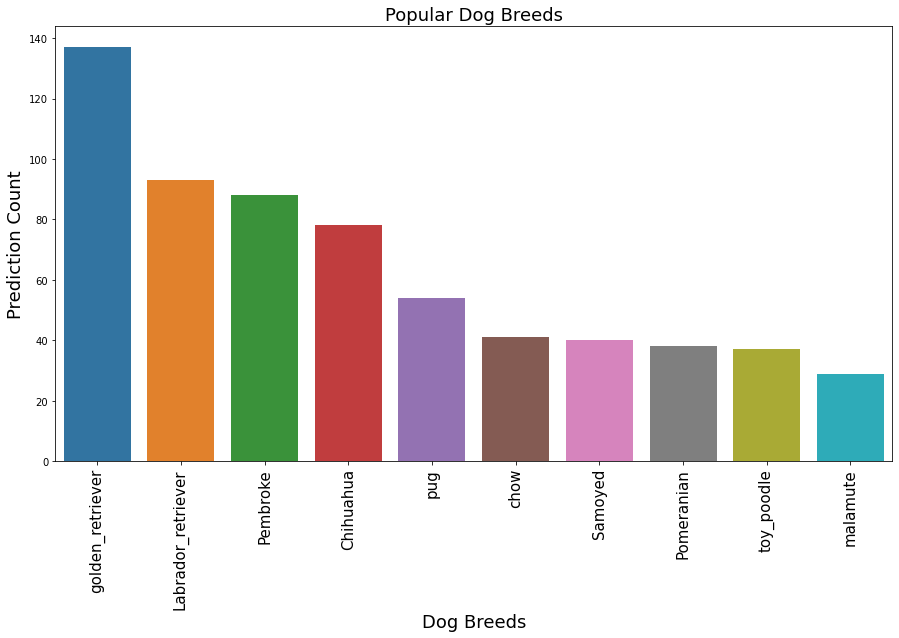

In [89]:
plt.figure(figsize = (15,8))
ax = sns.barplot(x = df_master_dataset_copy['p1'].value_counts()[0:10].index,
            y = df_master_dataset_copy['p1'].value_counts()[0:10],
            data = df_master_dataset_copy);
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontsize = 15);
plt.xlabel("Dog Breeds",fontsize = 18);
plt.ylabel("Prediction Count",fontsize = 18);
plt.title("Popular Dog Breeds",fontsize = 18);
plt.savefig('Popular_Dog_Breeds.png')

***The top 3 common dog breeds are Golden Retriever, Labrador Retriever and Chihuahua***

### Checking for which variable is correlated

In [68]:
df_master_dataset_copy.corr()

tweet_id  rating_numerator  rating_denominator  \
tweet_id            1.000000          0.251988           -0.014271   
rating_numerator    0.251988          1.000000            0.865628   
rating_denominator -0.014271          0.865628            1.000000   
retweet_count       0.406687          0.133414           -0.018049   
favorite_count      0.655759          0.183931           -0.021820   
img_num             0.213460          0.091649           -0.006293   
p1_conf             0.103016          0.074624            0.020351   
p1_dog              0.122117          0.169545            0.035356   
p2_conf            -0.000985         -0.012184           -0.013858   
p2_dog              0.124628          0.151100            0.034916   
p3_conf            -0.046610         -0.011558            0.009897   
p3_dog              0.096907          0.144962            0.036937   

                    retweet_count  favorite_count   img_num   p1_conf  \
tweet_id                 0.406687        0.655759  0.213460  0.103016   
rating_numerator         0.133414        0.183931  0.091649  0.074624   
rating_denominator      -0.018049       -0.021820 -0.006293  0.020351   
retweet_count            1.000000        0.913366  0.108295  0.054049   
favorite_count           0.913366        1.000000  0.136371  0.077517   
img_num                  0.108295        0.136371  1.000000  0.201053   
p1_conf                  0.054049        0.077517  0.201053  1.000000   
p1_dog                   0.006657        0.053543  0.034308  0.127766   
p2_conf                 -0.018834       -0.021360 -0.156185 -0.511437   
p2_dog                   0.015051        0.058846  0.055320  0.142308   
p3_conf                 -0.043495       -0.051996 -0.136493 -0.708544   
p3_dog                   0.009257        0.039577  0.057476  0.118506   

                      p1_dog   p2_conf    p2_dog   p3_conf    p3_dog  
tweet_id            0.122117 -0.000985  0.124628 -0.046610  0.096907  
rating_numerator    0.169545 -0.012184  0.151100 -0.011558  0.144962  
rating_denominator  0.035356 -0.013858  0.034916  0.009897  0.036937  
retweet_count       0.006657 -0.018834  0.015051 -0.043495  0.009257  
favorite_count      0.053543 -0.021360  0.058846 -0.051996  0.039577  
img_num             0.034308 -0.156185  0.055320 -0.136493  0.057476  
p1_conf             0.127766 -0.511437  0.142308 -0.708544  0.118506  
p1_dog              1.000000  0.107381  0.638255  0.046721  0.562301  
p2_conf             0.107381  1.000000  0.094914  0.480493  0.063319  
p2_dog              0.638255  0.094914  1.000000  0.030848  0.558742  
p3_conf             0.046721  0.480493  0.030848  1.000000  0.034438  
p3_dog              0.562301  0.063319  0.558742  0.034438  1.000000

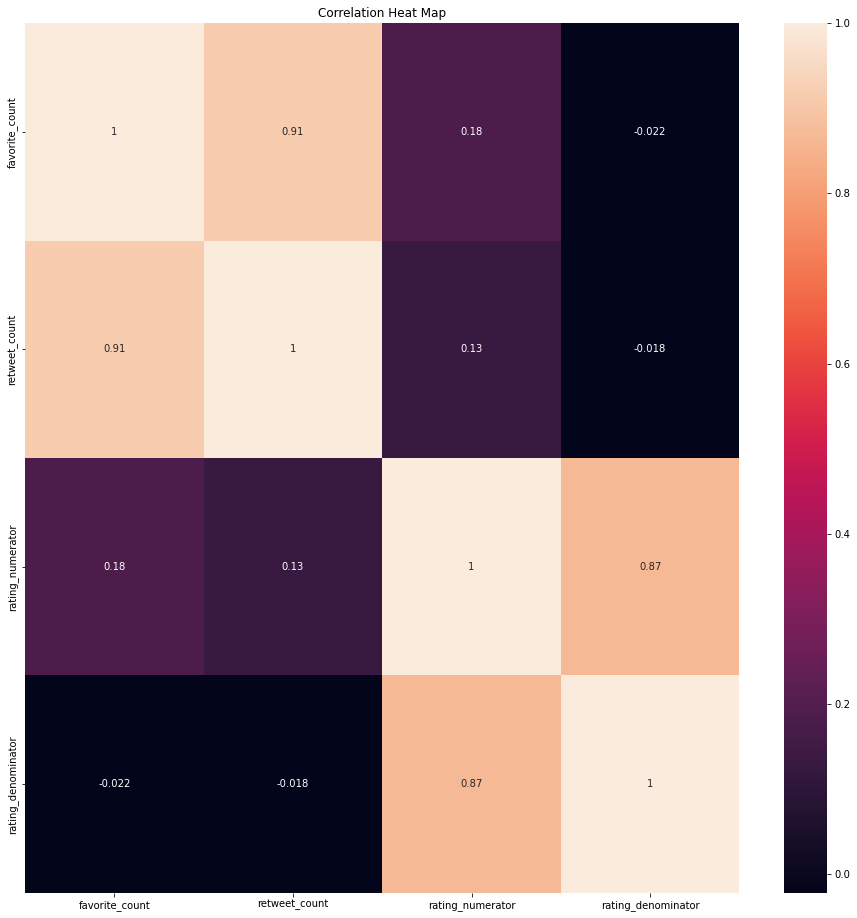

In [69]:
f, ax= plt.subplots(figsize=(16,16))
sns.heatmap(df_master_dataset_copy[['favorite_count', 'retweet_count', 'rating_numerator', 'rating_denominator', 'source']].corr(), annot=True);
plt.title('Correlation Heat Map')
plt.savefig('Heat_fave_retweet.png')
plt.show()

***This heat map shows that favorite_count has positive correlation with retweet_counts***

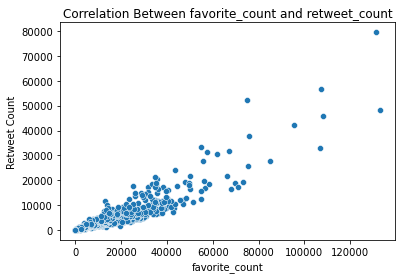

In [70]:
sns.scatterplot(data=df_master_dataset_copy, x="favorite_count", y="retweet_count")
plt.title('Correlation Between favorite_count and retweet_count')
plt.ylabel('Retweet Count')
plt.xlabel('favorite_count');
plt.savefig('scatter_fave_retweet.png')

***What source did Users tweet from?***

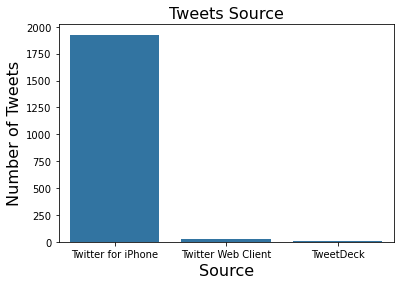

In [86]:
color_base = sns.color_palette()[0]
sns.countplot(data=df_master_dataset_copy, x='source', color=color_base)
plt.title('Tweets Source', fontsize = 16)
plt.ylabel('Number of Tweets', fontsize = 16)
plt.xlabel('Source', fontsize = 16);
plt.savefig('tweet_source.png')

***Most Users tweeted from an Iphone***
They dont use android?

### Dog with highest favorite count

In [72]:
top_fav = df_master_dataset_copy[df_master_dataset_copy['favorite_count'] == df_master_dataset_copy['favorite_count'].max()]
top_fav['jpg_url']

305    https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg
Name: jpg_url, dtype: object

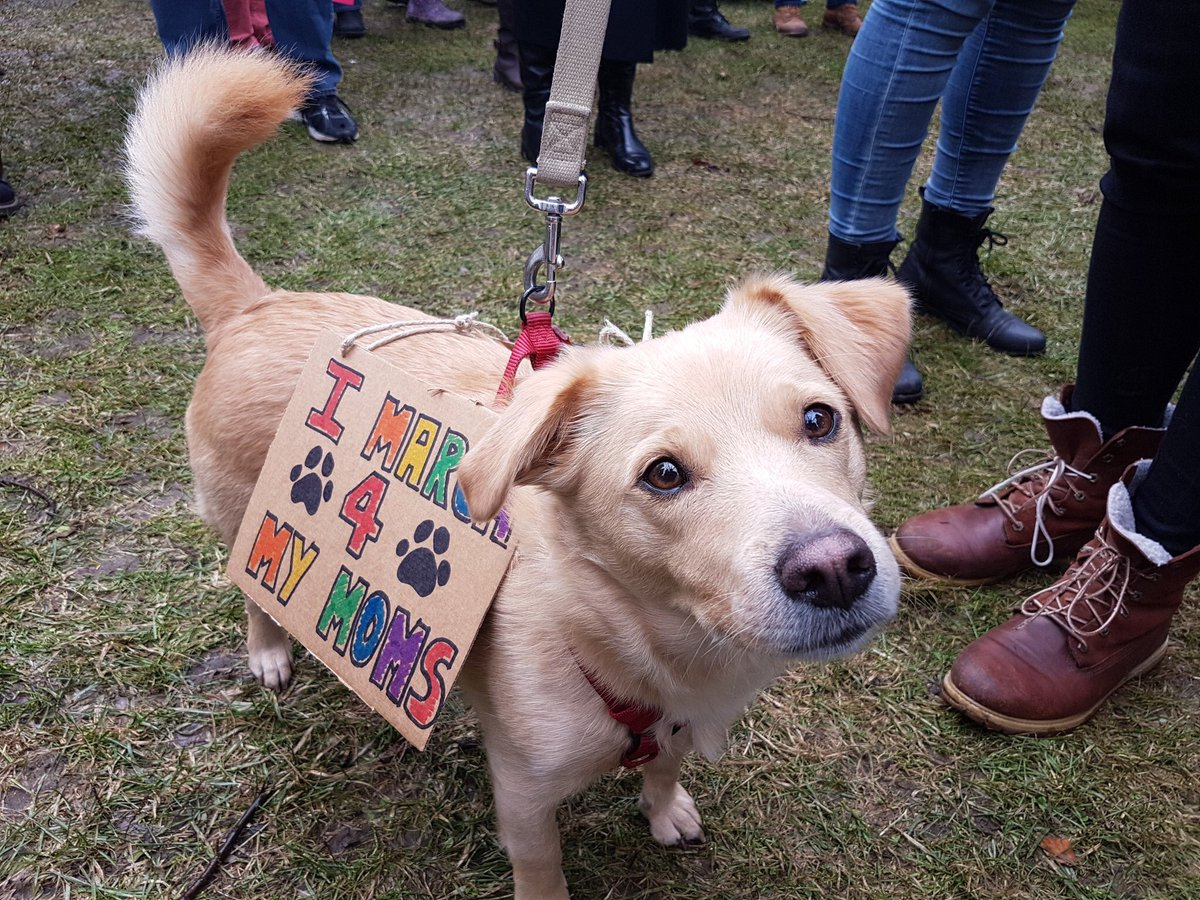

In [73]:
display.Image('https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg')

### Dog with highest retweet count.

In [82]:
top_retweet = df_master_dataset_copy[df_master_dataset_copy['retweet_count'] == df_master_dataset_copy['retweet_count'].max()]
print(top_retweet['jpg_url'])

766    https://pbs.twimg.com/ext_tw_video_thumb/74423...
Name: jpg_url, dtype: object


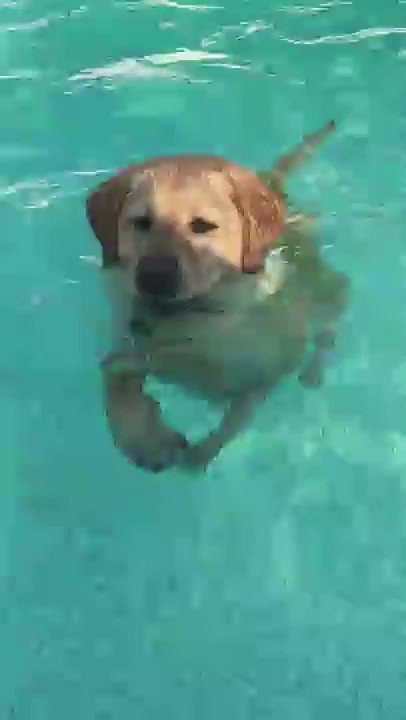

In [85]:
url = df_master_dataset_copy.jpg_url[766]
r = requests.get(url)
Image.open(BytesIO(r.content))

## Step 6: Reporting

Kindly find attached notebooks 
wrangle_report.pdf and
act_report.pdf

## References

https://www.kaggle.com/code/pulleyba/project-data-wrangling/notebook

https://stackoverflow.com/

https://medium.com/ub-women-data-scholars/we-rate-dogs-twitter-data-analysis-672e1a8903b4